In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [5]:
df = df[df['price'] > 30000]
df_subset = df[['price','area']]
df_subset.head()

,price,area
0,510000,108
1,215000,47
2,325000,116
3,315000,58
4,200000,63


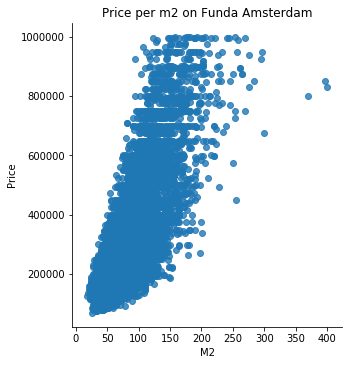

In [13]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset)
plt.xlabel('M2') 
plt.ylabel('Price')
plt.title('Price per m2 on Funda Amsterdam')
plt.show()

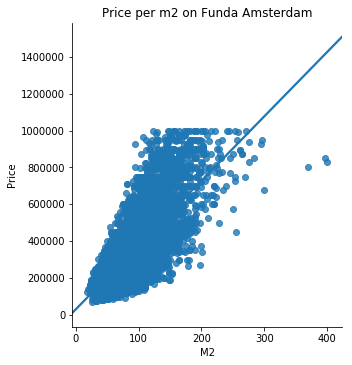

In [14]:
sns.lmplot(x='area', y='price', data=df_subset, ci=False)
plt.xlabel('M2') 
plt.ylabel('Price')
plt.title('Price per m2 on Funda Amsterdam')
plt.show()

In [17]:
x = df_subset[['area']] 
y = df_subset['price']
lm = LinearRegression() 
lm.fit(x, y)

b0 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.intercept_ #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X")

The regression line is equal to y = 3498.81 + 27983.93X


In [29]:
df = df.drop(columns='Unnamed: 0')  
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)


,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,year_built,price_p
0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,1906,405855.880756
1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,1938,192428.204791
2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,2003,433846.395637
3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,1910,230915.162752
4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,1906,248409.234552
5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,1991,465335.724877
6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,1906,251908.048913
7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,1906,570300.155680
8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,2007,325383.150474
9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,1900,262404.491993
